In [6]:
import numpy as np
import pandas as pd
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.ix[:,4]=le.fit_transform(df.ix[:,4])

/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
def name_classifier(name_df):    
    name_class_df = pd.DataFrame(columns=['miss','mrs','master','mr'])
    
    for name in name_df:        
        if 'Miss.' in name:
            df = pd.DataFrame([[1,0,0,0]],columns=['miss','mrs','master','mr'])
        elif 'Mrs.' in name:
            df = pd.DataFrame([[0,1,0,0]],columns=['miss','mrs','master','mr'])
        elif 'Master.' in name:
            df = pd.DataFrame([[0,0,1,0]],columns=['miss','mrs','master','mr'])
        elif 'Mr.' in name:
            df = pd.DataFrame([[0,0,0,1]],columns=['miss','mrs','master','mr'])
        else :
            df = pd.DataFrame([[0,0,0,0]],columns=['miss','mrs','master','mr'])
        name_class_df = name_class_df.append(df,ignore_index=True)        
    return name_class_df

In [10]:
ss=name_classifier(df["Name"])
#ss=pd.DataFrame(ss.values,index=range(1,892),columns=["miss","mrs","master","mr"])
df=pd.merge(df,ss,right_index=True,left_index=True)

In [11]:
def sum_maker(x,y):
    sums=pd.DataFrame(columns=["SUM"])
    for i in range(len(x)):
        s=pd.DataFrame([int(x[i])+int(y[i])],columns=["SUM"])
        sums=sums.append(s,ignore_index=True)
    return sums

In [12]:
sums=sum_maker(df["SibSp"].values,df["Parch"].values)
sums=pd.DataFrame(sums.values,index=range(891),columns=["SUM"])
df=pd.merge(df,sums,right_index=True,left_index=True)

In [13]:
def name(x):
    namesum1=[]
    namesum={}
    namesum2=[]
    for i in range(len(x)):
        name=x[i].split(",")
        if name[0] in namesum1:
            namesum1.append(name[0])
            namesum[name[0]]+=1
        else:
            namesum[name[0]]=1
            namesum1.append(name[0])
    for p in range(len(namesum1)):
        namesum2.append([namesum1[p],namesum[namesum1[p]]])
    namesum3=pd.DataFrame(namesum2,index=range(len(namesum1)),columns=["myoji","namesum"])
    return namesum3

In [14]:
namesum=name(df["Name"])
df=pd.merge(df,namesum,right_index=True,left_index=True)

In [15]:
s=pd.get_dummies(df["Embarked"])
df=pd.merge(df,s,left_index=True,right_index=True)

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,miss,mrs,master,mr,SUM,myoji,namesum,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,0,0,1,1,Braund,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,1,Cumings,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,0,0,Heikkinen,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,1,0,0,1,Futrelle,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,0,0,1,0,Allen,2,0,0,1
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,...,0,0,0,1,0,Moran,3,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,...,0,0,0,1,0,McCarthy,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,...,0,0,1,0,4,Palsson,4,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,...,0,1,0,0,2,Johnson,6,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,...,0,1,0,0,1,Nasser,2,1,0,0


In [17]:
df2 = df
df = df2.iloc[:,[2,4,5,6,7,9,12,13,14,15,16,18,19,20,21]]

In [18]:
from sklearn.preprocessing import Imputer
imr1=Imputer(missing_values="NaN",strategy="median",axis=0)
imr2=Imputer(missing_values="NaN",strategy="median",axis=0)
imr3=Imputer(missing_values="NaN",strategy="median",axis=0)
imr4=Imputer(missing_values="NaN",strategy="median",axis=0)

df[df["miss"]==1]=imr1.fit_transform(df[df["miss"]==1])
df[df["mr"]==1]=imr2.fit_transform(df[df["mr"]==1])
df[df["mrs"]==1]=imr3.fit_transform(df[df["mrs"]==1])
df[df["master"]==1]=imr4.fit_transform(df[df["master"]==1])

/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/masakick/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [19]:
imr=Imputer(missing_values="NaN",strategy="median",axis=0)
imr.fit(df)
df=pd.DataFrame(imr.transform(df),columns=["Pclass","Sex","Age","SibSp","Parch","Fare","miss","mrs","master","mr","SUM","namesum","C","Q","S"])

In [20]:
y=df2.iloc[:,1]
x=df
y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [28]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
import lightgbm as lgb
light_gbm =lgb.LGBMClassifier(objective="binary",metric="accuracy")

In [48]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler()
sc3 = StandardScaler()
sc4 = StandardScaler()
x["Fare"]= sc1.fit_transform(x["Fare"].reshape([-1,1]))
x["SibSp"]=sc2.fit_transform(x["SibSp"].reshape([-1,1]))
x["Parch"]=sc3.fit_transform(x["Parch"].reshape([-1,1]))
x["Age"]=sc4.fit_transform(x["Age"].reshape([-1,1]))

/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [49]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,miss,mrs,master,mr,SUM,namesum,C,Q,S
0,3.0,1.0,-0.556543,0.432793,-0.473674,-0.502445,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0
1,1.0,0.0,0.651416,0.432793,-0.473674,0.786845,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,3.0,0.0,-0.254553,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.424924,0.432793,-0.473674,0.420730,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0
4,3.0,1.0,0.424924,-0.474545,-0.473674,-0.486337,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0
5,3.0,1.0,0.047436,-0.474545,-0.473674,-0.478116,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0
6,1.0,1.0,1.859375,-0.474545,-0.473674,0.395814,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,3.0,1.0,-2.066492,2.247470,0.767630,-0.224083,0.0,0.0,1.0,0.0,4.0,4.0,0.0,0.0,1.0
8,3.0,0.0,-0.179056,-0.474545,2.008933,-0.424256,0.0,1.0,0.0,0.0,2.0,6.0,0.0,0.0,1.0
9,2.0,0.0,-1.160523,0.432793,-0.473674,-0.042956,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0


In [25]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

/home/masakick/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score

depth_ls = [3,5,7,9,12,15,17]
sub_sample_ls = [0.6,0.7,0.8,0.9,1]
gbm_params = {"max_depth":depth_ls,"subsample":sub_sample_ls}

learning_rate = [0.01,0.1,1.0,10,100]
num_leaves = [7,31,127,511,4095,32767]
light_gbm_params = {"learning_rate":learning_rate,"num_leaves":num_leaves}

gs = GridSearchCV(estimator=light_gbm,param_grid=light_gbm_params,n_jobs=-1)
gs.fit(x_train,y_train)
print(accuracy_score(y_true=y_train,y_pred=gs.predict(x_train)))
print(accuracy_score(y_true=y_test,y_pred=gs.predict(x_test)))

0.829855537721
0.787313432836


In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

C_ls = [0.001,0.01,0.1,1,10,100]
lr_gs = GridSearchCV(estimator=lr,param_grid={"C":C_ls},n_jobs=-1)
lr_gs.fit(x_train,y_train)
print(accuracy_score(y_train,lr_gs.predict(x_train)))
print(accuracy_score(y_test,lr_gs.predict(x_test)))

0.83467094703
0.820895522388


In [64]:
from sklearn.ensemble import VotingClassifier
est_ls = [("gs",gs),("lr_gs",lr_gs),("forest",forest)]

vc = VotingClassifier(est_ls,voting="hard",n_jobs=-1)
vc.fit(x_train,y_train)
print(accuracy_score(y_train,vc.predict(x_train)))
print(accuracy_score(y_test,vc.predict(x_test)))

0.873194221509
0.805970149254


In [60]:
df3=pd.read_csv("test.csv")
#df3.columns=["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
#df3=df3.ix[1:,:]
ss=name_classifier(df3["Name"])
ss=pd.DataFrame(ss.values,index=range(418),columns=["miss","mrs","master","mr"])
df4=pd.merge(df3,ss,right_index=True,left_index=True)

sums=sum_maker(df4["SibSp"].values,df4["Parch"].values)
sums=pd.DataFrame(sums.values,index=range(418),columns=["SUM"])
df4=pd.merge(df4,sums,right_index=True,left_index=True)

namesums=name(df4["Name"])
df4=pd.merge(df4,namesums,right_index=True,left_index=True)

df4["Sex"]=le.transform(df4["Sex"])
s1=pd.get_dummies(df4["Embarked"])

df4=pd.merge(df4,s1,right_index=True,left_index=True)
df4=df4.ix[:,[1,3,4,5,6,8,11,12,13,14,15,17,18,19,20]]


df4[df4["miss"]==1]=imr1.transform(df4[df4["miss"]==1])
df4[df4["mr"]==1]=imr2.transform(df4[df4["mr"]==1])
df4[df4["mrs"]==1]=imr3.transform(df4[df4["mrs"]==1])
df4[df4["master"]==1]=imr1.transform(df4[df4["master"]==1])
df4=pd.DataFrame(imr.transform(df4),columns=["Pclass","Sex","Age","SibSp","Parch","Fare","miss","mrs","master","mr","SUM","namesum","C","Q","S"])

df4["Fare"]= sc1.fit_transform(df4["Fare"].reshape([-1,1]))
df4["SibSp"]=sc2.fit_transform(df4["SibSp"].reshape([-1,1]))
df4["Parch"]=sc3.fit_transform(df4["Parch"].reshape([-1,1]))
df4["Age"]=sc4.fit_transform(df4["Age"].reshape([-1,1]))
#pd.DataFrame(a)
x_te=df4
#x_te.columns=["Pclass","Sex","Age","SibSp","Parch","Fare","miss","mr","mrs","master","SUM","C","Q","S"]
x_te

/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/masakick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: reshape is de

,Pclass,Sex,Age,SibSp,Parch,Fare,miss,mrs,master,mr,SUM,namesum,C,Q,S
0,3.0,1.0,0.356068,-0.499470,-0.400248,-0.497148,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,3.0,0.0,1.333968,0.616992,-0.400248,-0.512012,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,2.0,1.0,2.507448,-0.499470,-0.400248,-0.463838,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3.0,1.0,-0.230672,-0.499470,-0.400248,-0.482211,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,3.0,0.0,-0.621832,0.616992,0.619896,-0.417234,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0
5,3.0,1.0,-1.247688,-0.499470,-0.400248,-0.472129,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,3.0,0.0,0.004024,-0.499470,-0.400248,-0.500733,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,2.0,1.0,-0.308904,0.616992,0.619896,-0.117665,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0
8,3.0,0.0,-0.934760,-0.499470,-0.400248,-0.507903,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,3.0,1.0,-0.700064,1.733455,-0.400248,-0.204600,0.0,0.0,0.0,1.0,2.0,4.0,0.0,0.0,1.0


In [61]:
x_te.isnull().sum()

Pclass     0
Sex        0
Age        0
SibSp      0
Parch      0
Fare       0
miss       0
mrs        0
master     0
mr         0
SUM        0
namesum    0
C          0
Q          0
S          0
dtype: int64

In [65]:
y_pred=vc.predict(x_te)
len(y_pred)

418

In [66]:
zip_data = zip(df3.ix[:,0].astype(int), y_pred.astype(int))
predict_data = list(zip_data)
import csv
with open("predcit_result_data.csv","w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(df3.ix[:,0].astype(int), y_pred.astype(int)):
        writer.writerow([pid, survived])

## メモ

/home/masakick/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


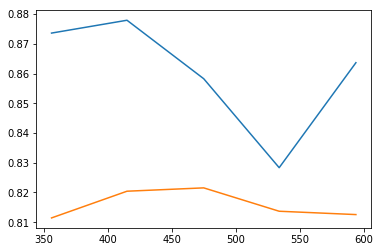

In [37]:
%matplotlib inline
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

print("light_gbm")
training_sizes, train_scores, test_scores = \
    learning_curve(gs,x,y,scoring="accuracy", train_sizes = [0.6,0.7,0.8,0.9,1.0],n_jobs=-1)
plt.plot(training_sizes,train_scores.mean(axis=1),label="training_scores")
plt.plot(training_sizes,test_scores.mean(axis=1),label="test_scores")
plt.show()


logistic


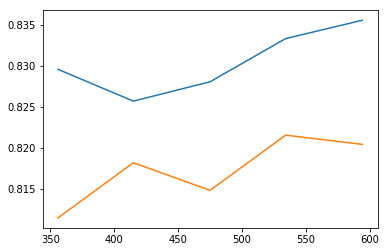

In [53]:
print("logistic")
training_sizes, train_scores, test_scores = \
    learning_curve(lr_gs,x,y,scoring="accuracy", train_sizes = [0.6,0.7,0.8,0.9,1.0],n_jobs=-1)
plt.plot(training_sizes,train_scores.mean(axis=1),label="training_scores")
plt.plot(training_sizes,test_scores.mean(axis=1),label="test_scores")
plt.show()

vc


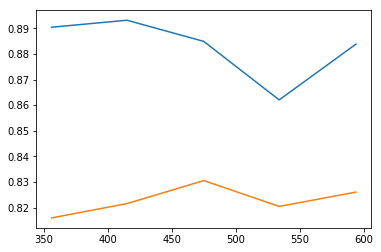

In [67]:
print("vc")
training_sizes, train_scores, test_scores = \
    learning_curve(vc,x,y,scoring="accuracy", train_sizes = [0.6,0.7,0.8,0.9,1.0],n_jobs=-1)
plt.plot(training_sizes,train_scores.mean(axis=1),label="training_scores")
plt.plot(training_sizes,test_scores.mean(axis=1),label="test_scores")
plt.show()